In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline

(array([  987.,   981.,  1032.,   973.,  1035.,  1034.,  1000.,   980.,
         1063.,   915.]),
 array([  6.92020824e-04,   1.00034802e+00,   2.00000401e+00,
          2.99966001e+00,   3.99931600e+00,   4.99897200e+00,
          5.99862800e+00,   6.99828399e+00,   7.99793999e+00,
          8.99759598e+00,   9.99725198e+00]),
 <a list of 10 Patch objects>)

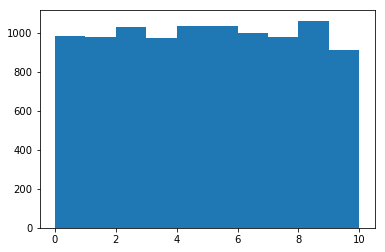

In [153]:
# Генерируем выборку размера 10^4 из нормального распределения
# на отрезке [0, 10]. Построим гистограмму полученной выборки
N = 10**4
th = 10
uniform = st.uniform(loc=0, scale=th)
X = uniform.rvs(N)
plt.hist(X)

In [154]:
# Функция для заданного значения тета генерирует соответствующую выборку,
# и находит необходимые оценки для всех n <= N  
# и возвращает их в виде пяти массивов
def Estimators(th):
    un = st.uniform(loc=0, scale=th)
    X = un.rvs(N)
    # 2 * X.mean
    ev1 = [2*np.mean(X[:n]) for n in range(1, len(X)+1)]
    #X.mean + X_(n)/2
    ev2 = [np.mean(X[:n]) + np.amax(X[:n]) / 2 for n in range(1, len(X) + 1)]
    #(n + 1) * X_(1)
    ev3 = [(n + 1)*np.min(X[:n]) for n in range(1, len(X) + 1)] 
    #X_(1) + X_(n)
    ev4 = [np.amin(X[:n]) + np.amax(X[:n]) for n in range(1, len(X) + 1)]
    #(n + 1) / n * X_(n)
    ev5 = [(n + 1) / n * np.amax(X[:n]) for n in range(1, len(X) + 1)]
    return ev1, ev2, ev3, ev4, ev5

In [150]:
# Находим оценки для исходного значения тета
ev = Estimators(th)

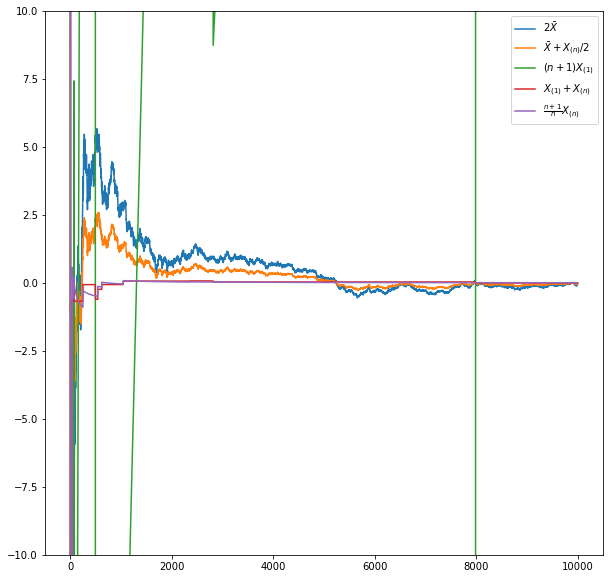

In [160]:
# Построим на одном графике все наши оценки
X_f = list(range(N))
plt.figure(figsize=(10,10))
plt.ylim((-10,10))
plt.plot(X_f, np.array(ev[0])-th, label='$2 \\bar{X}$')
plt.plot(X_f, np.array(ev[1])-th, label='$\\bar{X} + X_{(n)} / 2$')
plt.plot(X_f, np.array(ev[2])-th, label='$(n + 1)X_{(1)}$')
plt.plot(X_f, np.array(ev[3])-th, label='$X_{(1)} + X_{(n)}$')
plt.plot(X_f, np.array(ev[4])-th, label='$\\frac{n+1}{n} X_{(n)}$')
plt.legend()
plt.show()

Видим, что оценка $(n + 1)X_{(1)}$ на таком промежутке сходится плохо. Следующие графики будем строить без нее.

In [155]:
# Значения тета, для которых будем искать оценки 
Theta = [5, 10, 20, 50, 100]

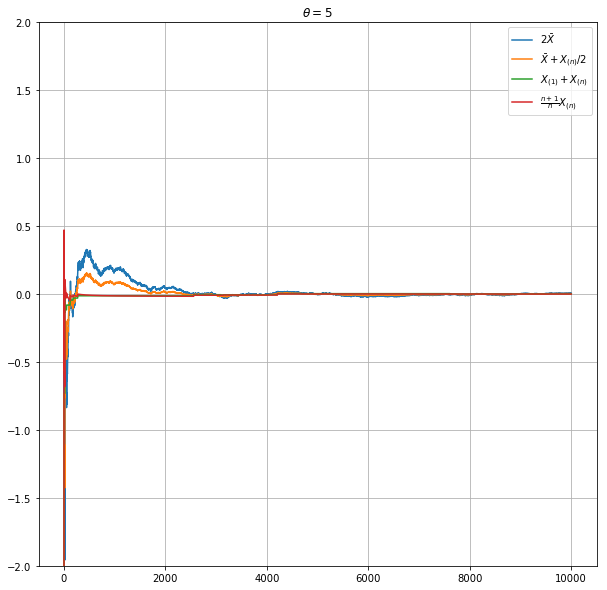

value =  0.000484088088128 number =  4


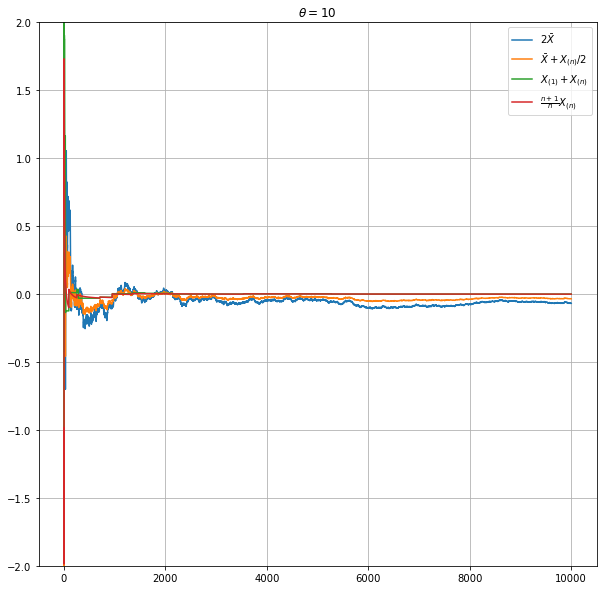

value =  0.000557598173613 number =  3


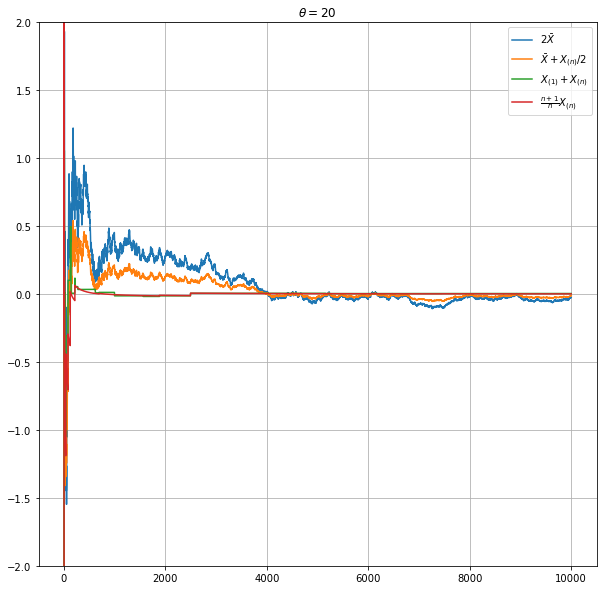

value =  0.000772496590827 number =  4


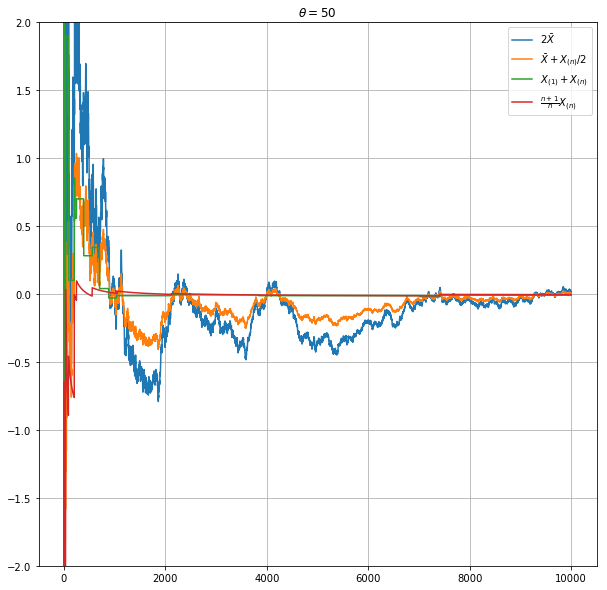

value =  0.00317882170037 number =  1


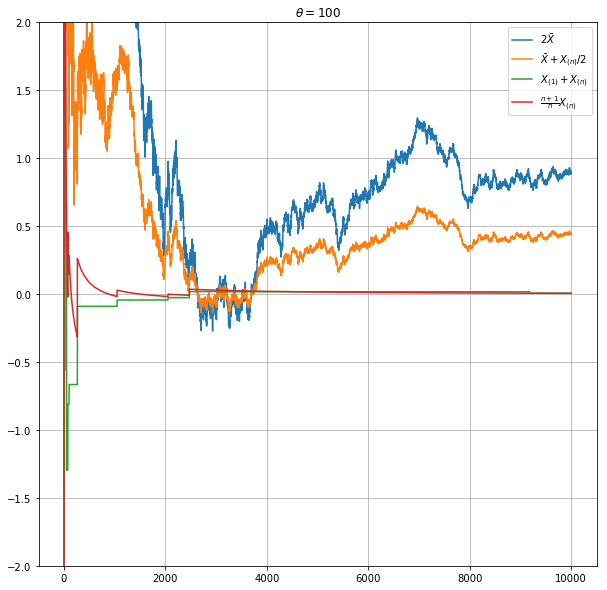

value =  0.00478038916479 number =  4


In [158]:
for th in Theta:
    # Считаем все необходимые оценки
    est = Estimators(th)
    # Cтроим график
    plt.figure(figsize=(10,10))
    plt.subplot()
    plt.title('$ \\theta = %d $'%th)
    plt.ylim((-2,2))
    plt.plot(X_f, np.array(est[0])-th, label='$2 \\bar{X}$')
    plt.plot(X_f, np.array(est[1])-th, label='$\\bar{X} + X_{(n)} / 2$')
    plt.plot(X_f, np.array(est[3])-th, label='$X_{(1)} + X_{(n)}$')
    plt.plot(X_f, np.array(est[4])-th, label='$\\frac{n+1}{n} X_{(n)}$')    
    plt.legend()
    plt.grid()
    plt.show()
    # Теперь посмотрим, какая оценка получилась дает лучший результат 
    dif = sorted([(abs(est[i][N - 1] - th), i) for i in range(len(est))])
    print('value = ', dif[0][0], 'number = ', dif[0][1])

Как видим, практически во всех экспериментах лучше всего сходится оценка $\frac{n+1}{n} X_{(n)}$. 

Оценки $2 \bar{X}$ и $\bar{X}+X_{(n)} / 2$ сходятся хуже всего.

С ростом параметра $\theta$ оценки сходятся все медленнее.